In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,
                                              image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size =BATCH_SIZE )

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
#32: 32 batches 256,256: 256 by 256 size 3: 3 channels-rgb label batch me 0=early blight 1=late 2=healthy uint8 se converted float numpy to int

(32, 256, 256, 3)
[0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 2 0 0 2 2 1 0]


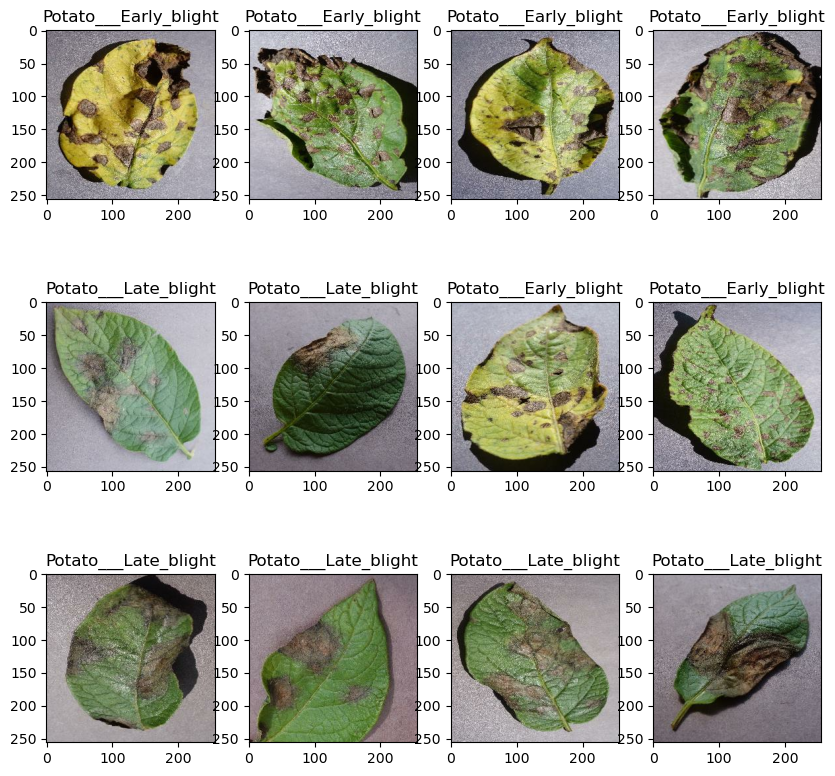

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])

In [9]:
#SPLITTING DATASET to train and test 80%==> training 20%==> 10% validation,10% test

In [10]:
'''train_size=0.8
len(dataset)*train_size
#80 percent of 68 batches
train_ds=dataset.take(54)
#54 ke alawa baaki
test_ds=dataset.skip(54)
len(test_ds)
 val_size=0.1
 len(dataset)*val_size
val_ds=test_ds.take(6)
len(val_ds)
test_ds=test_ds.skip(6)
len(test_ds)'''

'train_size=0.8\nlen(dataset)*train_size\n#80 percent of 68 batches\ntrain_ds=dataset.take(54)\n#54 ke alawa baaki\ntest_ds=dataset.skip(54)\nlen(test_ds)\n val_size=0.1\n len(dataset)*val_size\nval_ds=test_ds.take(6)\nlen(val_ds)\ntest_ds=test_ds.skip(6)\nlen(test_ds)'

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(ds_size*train_split)
  val_size=int(ds_size*val_split)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [13]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)#rgb val between 0 and 1
    ])

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [16]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([resize_and_rescale,data_augmentation
                        ,layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)


C:\Users\Arshmehar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [19]:
history=model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 560ms/step - accuracy: 0.4473 - loss: 0.9469 - val_accuracy: 0.5365 - val_loss: 0.9348
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 590ms/step - accuracy: 0.6299 - loss: 0.7762 - val_accuracy: 0.6615 - val_loss: 0.6589
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 629ms/step - accuracy: 0.7926 - loss: 0.4978 - val_accuracy: 0.7656 - val_loss: 0.4905
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 628ms/step - accuracy: 0.8043 - loss: 0.4363 - val_accuracy: 0.8750 - val_loss: 0.3073
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 571ms/step - accuracy: 0.8873 - loss: 0.2769 - val_accuracy: 0.9010 - val_loss: 0.2515
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 579ms/step - accuracy: 0.9138 - loss: 0.2125 - val_accuracy: 0.5781 - val_loss: 0.9217
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 573ms/step - accuracy: 0.8643 - loss: 0.3416 - val_accuracy: 0.9271 - val_loss: 0.1706
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 572ms/step - accuracy: 0.9172 - loss: 0.1956 - val_accu

In [20]:
scores=model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.9308 - loss: 0.1398


In [21]:
scores

[0.18114276230335236, 0.92578125]

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

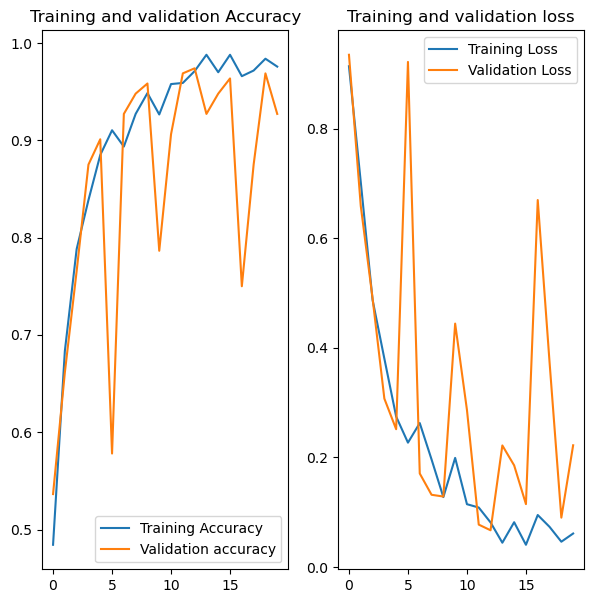

In [25]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()


first image to predict
actual_label= Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
predicted_label= Potato___Early_blight


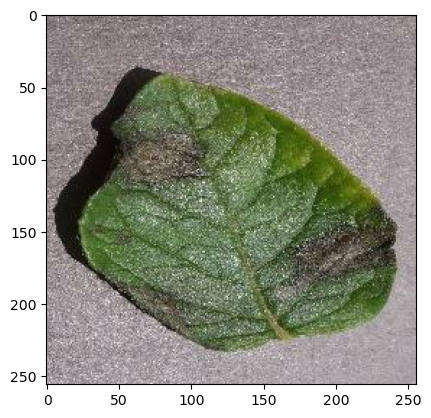

In [26]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image=(images_batch[0].numpy().astype("uint8"))
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual_label=",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print("predicted_label=",class_names[np.argmax(batch_prediction[0])])

In [27]:
#array with 3 entries because we have 3 neurons and activation= softmax ie 3 probabilities highest probability==> actual class [9.9999982e-01 1.2734986e-07 1.0140493e-20]

In [28]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)#create a batch

  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


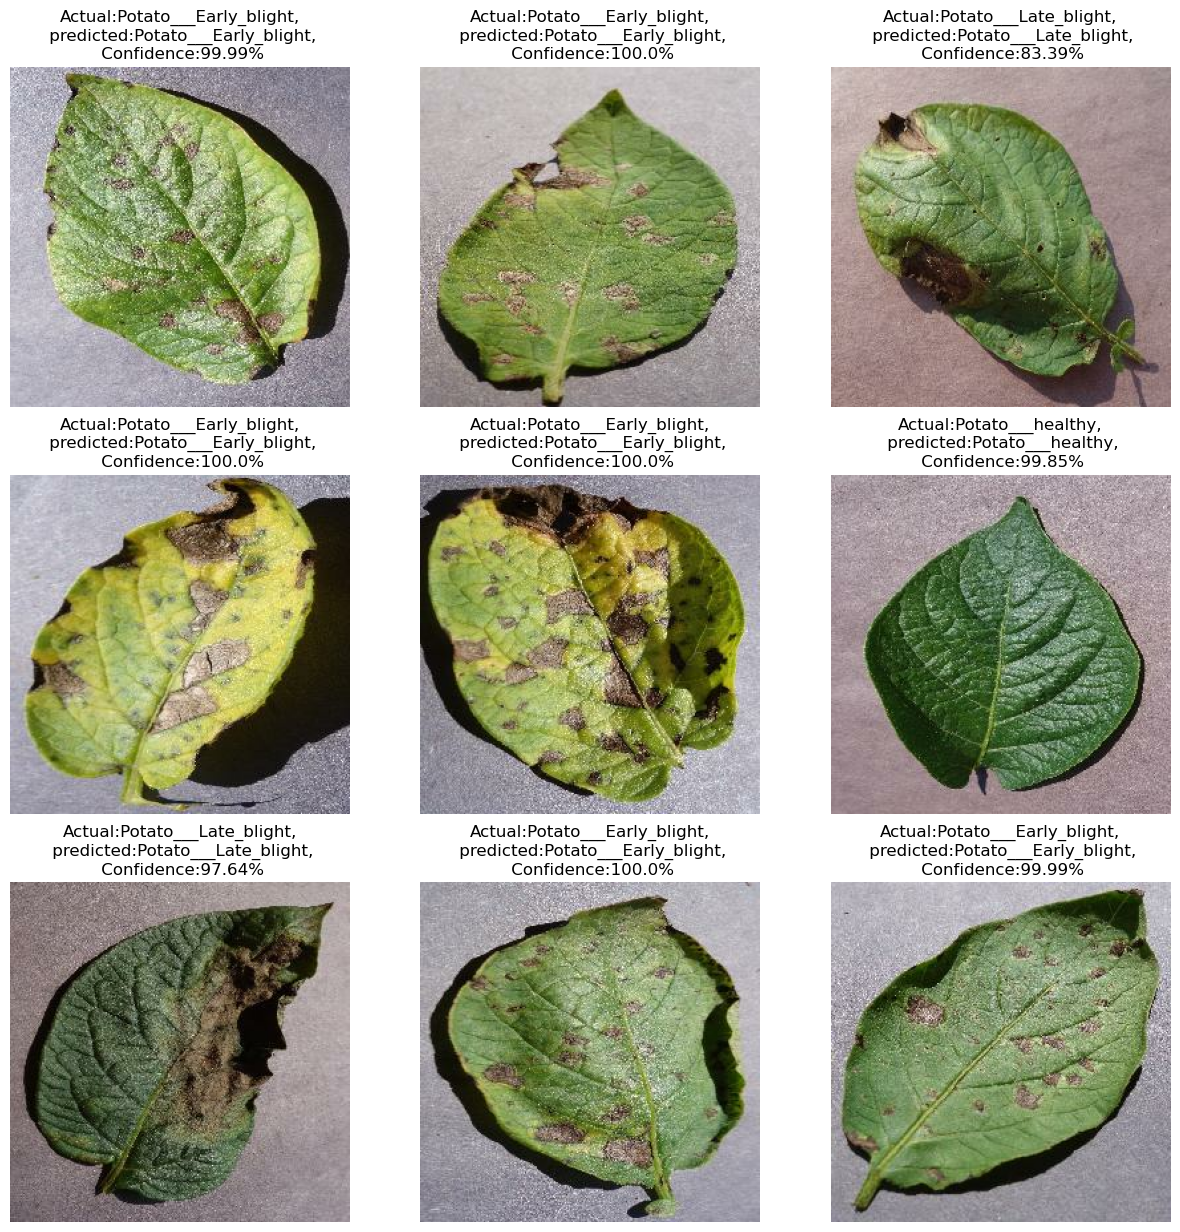

In [29]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n Confidence:{confidence}%")
    plt.axis("off")

In [32]:
model_version=1

model.save('my_model.keras')